Rats in New York City
======
## Intro to Data Science Final Report
### Liam O’Brien & Van Nhat Huy Phan

# 1. Data Exploration

Our initial goal for this project was to explore the rat sightings dataset and to see if there were any correlations between rat spottings and any external factors. Our dataset comes from a released CSV file provided by New York City. We first looked through our dataset of over 100k+ entries spanning from 2010 to 2016 to see if we could find any trends or correlations.

*Links to download the dataset*
- https://www.kaggle.com/new-york-city/nyc-rat-sightings
- https://www.kaggle.com/mathijs/weather-data-in-new-york-city-2016

In [15]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the rat dataset
ratData = pd.read_csv('rat2016.csv', parse_dates = [0])
ratData.count()

CreatedDate    17078
Longitude      17078
Latitude       17078
dtype: int64

The origial dataset has over 50k+ entries with 50+ columns of irrelavent information, so we filter out the entries only in 2016

In [16]:
ratData.head()

,CreatedDate,Longitude,Latitude
0,2016-01-01,-73.857150,40.806742
1,2016-01-01,-73.954813,40.612525
2,2016-01-01,-74.188306,40.541135
3,2016-01-01,-73.951252,40.778895
4,2016-01-01,-74.009348,40.650892


Our first step was to determine which part of New York City has the most rat spottings, what kind of residences report the most rats, and what time of year are the most rat sightings reported. We knew we had to be cautious in classifying and generalizing our data. Our dataset only represents entries of people who called 311 in the city and reported a rat sighting to DOHMH (Department of Health and Mental Health) to have it exterminated. This dataset does not represent rats in public areas or parks such as subways and Central Park.  

First with a simple count we were able to see that Brooklyn has the most amount of rats reported compared to all other boroughs. Next we found out that 3+ family apartment buildings have the most reports of rats. Our hypothesis is that housing with more residents allows more access for rats to enter and also that more people means the likelihood of someone reporting a rat is higher than single occupancy residences.

With those basics out of the way, we moved on to correlation. We needed another dataset to explore and compare our rat data to. After searching we found a second dataset of weather recorded in NYC daily for 2016. This dataset included the low, high, average temperature, precipitation, and finally snow total. We then grouped our rat data monthly for the year 2016 and graphed the monthly rat count to the monthly average temperature as seen below. 

In [17]:
# Read weather data
weather = pd.read_csv('weather.csv', parse_dates = [0])
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2016-01-01,42,34,38.0,0,0,0
1,2016-01-02,40,32,36.0,0,0,0
2,2016-01-03,45,35,40.0,0,0,0
3,2016-01-04,36,14,25.0,0,0,0
4,2016-01-05,29,11,20.0,0,0,0


# 2. Data visualization

In [18]:
# Filter out data in Jan 2016
janRatFilter = (ratData['CreatedDate'] >= '2016-12-01') & (ratData['CreatedDate'] <= '2016-12-31')
janRat = ratData.loc[janRatFilter]
janRat.count()

CreatedDate    993
Longitude      993
Latitude       993
dtype: int64

We repeat this process for 12 months to get the graph below

![alt text](Temp_vs_count_bar_graph.png "Title")

*With this graph we are able to safely say that the warmer the temperature is correlated to the number of rats reported.*

Our next task we set out to accomplish was to visually see our rat data. Using pandas packages we set out to create a heatmap of rat reports for the year 2016 to visually see if we could notice any patterns or trends.

## Visualize data for January

In [19]:
# Preprocess data to plot
janRatLocation = janRat[['Longitude', 'Latitude']]

m = folium.Map([40.707772, -74.012963], zoom_start=10)

# mark each station as a point
for index, row in janRatLocation.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=15,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)
    
# convert to (n, 2) nd-array format for heatmap
janRatList = janRatLocation[['Latitude', 'Longitude']].as_matrix()

# Plot heatmap
m.add_children(plugins.HeatMap(janRatList, radius=12))

## Visualize data for 12 months

![alt text](map_1_second.gif "Title")

We set the radius initially to 15 as seen above but we could not clearly see any pattern. We then lowered the radius of each location from 15 to 12 to generate the next heatmap:

![alt text](map2_1_second.gif "Title")

This is the only failure we came across in our analysis. Although we are able to successfully generate a heatmap over the city, we were unable to see any drastic patterns or movement in the rat sightings for the year 2016. For our final report we would like to explore the data further than a single year and see if we can concretely draw conclusions to rat reports. 

In [20]:
# Count how many rats per day
ratDataEntries = ratData[['CreatedDate']]
ratDataEntries = ratDataEntries.groupby(['CreatedDate']).size().reset_index(name='RatCounts')
ratDataEntries.head()

,CreatedDate,RatCounts
0,2016-01-01,23
1,2016-01-02,23
2,2016-01-03,27
3,2016-01-04,32
4,2016-01-05,41


In [21]:
finalData = pd.concat([weather[['average temperature']], ratDataEntries[['RatCounts']]], axis=1)
finalData.columns = ['AvgTemp', 'RatCounts']
finalData['AvgTemp'] = finalData['AvgTemp']
finalData.head()

,AvgTemp,RatCounts
0,38.0,23
1,36.0,23
2,40.0,27
3,25.0,32
4,20.0,41


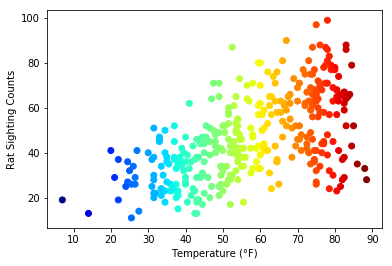

In [22]:
# Visualize data
X = finalData['AvgTemp'].values.reshape(-1, 1)
y = finalData['RatCounts']

plt.xlabel('Temperature (°F)')
plt.ylabel('Rat Sighting Counts')
plt.scatter(X, y, c=X, cmap="jet")

*The above graph shows that the number of rat sighting increase is directly correlated to the increasing temperature.*

Our gathered information has various uses for NYC. Having access to the dataset allows us to see trends and potentially predict patterns of rat sightings. Our end goal for this project would be to drastically reduce the rat count and vermin in the city to create a cleaner and safer environment for its residents..  In the future we would like to generate a heatmap possibly monthly or daily from 2010 to 2016 which is how recent our dataset goes to.

# 3. Data Prediction

Our second goal is to see if any major weather events such as heavy snow or hurricane Sandy had any major effect on the rat reports. Lastly we want to implement an artificial intelligence package for predicting future rat sightings. We want to train our algorithm with all the dataset we have up to 2016 and see what the algorithm predicts for the year 2017. If the dataset from 2017 is released we would like to compare our AI analysis to the actual data.

In [28]:
# Shuffle and split the data into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [29]:
from sklearn.svm import SVR

linear_model = SVR(kernel='linear').fit(X_train, y_train) 
rbf_model = SVR(kernel='rbf').fit(X_train, y_train) 
poly_model = SVR(kernel='poly', degree=2).fit(X_train, y_train)

print("Linear model R2 score is: ", linear_model.score(X_test, y_test))
print("RBF model R2 score is: ", rbf_model.score(X_test, y_test))
print("Poly model R2 score is: ", poly_model.score(X_test, y_test))
print("\nLinear model gives the best results")

Linear model R2 score is:  0.468153291467
RBF model R2 score is:  0.190267677495
Poly model R2 score is:  0.402656106185

Linear model gives the best results


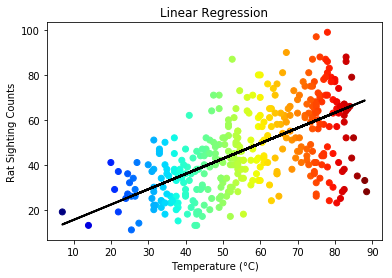

In [25]:
plt.xlabel('Temperature (°C)')
plt.ylabel('Rat Sighting Counts')
plt.scatter(X, y, c=X, cmap="jet")

y_lin = linear_model.predict(X_test)
plt.plot(X_test, y_lin, color='k', lw=2)
plt.title('Linear Regression')
plt.show()

The model we chose did a good job with a R2 score of 0.46.